# Data Importing & EDA of Expanded Data

## Mounting & importing Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/EC Infosolutions Challenge/New_Restaurant.csv',parse_dates=['dts'])
df.shape

(60007, 9)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## EDA of Expanded Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60007 entries, 0 to 60006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dts            60007 non-null  datetime64[ns]
 1   shift          60007 non-null  object        
 2   weekday        60007 non-null  int64         
 3   ticket_code    60007 non-null  object        
 4   party_size     60007 non-null  int64         
 5   menu_category  60007 non-null  object        
 6   menu_item      60007 non-null  object        
 7   item_price     60007 non-null  float64       
 8   item_qty       60007 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 4.1+ MB


In [5]:
df.columns

Index(['dts', 'shift', 'weekday', 'ticket_code', 'party_size', 'menu_category',
       'menu_item', 'item_price', 'item_qty'],
      dtype='object')

In [6]:
df_categorical = df[['shift', 'ticket_code', 'menu_category', 'menu_item']]
print(df_categorical.shape)
print(df_categorical.head())

(60007, 4)
   shift ticket_code       menu_category       menu_item
0  lunch    YALE0001              BREADS     GARLIC NAAN
1  lunch     UBER002  VEGETABLE SPECIALS     MALAI KOFTA
2  lunch    YALE0009  VEGETABLE SPECIALS  SARSON DA SAAG
3  lunch    YALE0019              BREADS            NAAN
4  lunch    YALE0010              BREADS            NAAN


In [7]:
for i in np.array(df.columns):
    print('Unique values in ' + str(i) + ' attribute are {}'.format(len(df[i].unique()))  )

Unique values in dts attribute are 13394
Unique values in shift attribute are 2
Unique values in weekday attribute are 7
Unique values in ticket_code attribute are 27
Unique values in party_size attribute are 5
Unique values in menu_category attribute are 8
Unique values in menu_item attribute are 43
Unique values in item_price attribute are 12
Unique values in item_qty attribute are 4


<Figure size 432x288 with 0 Axes>

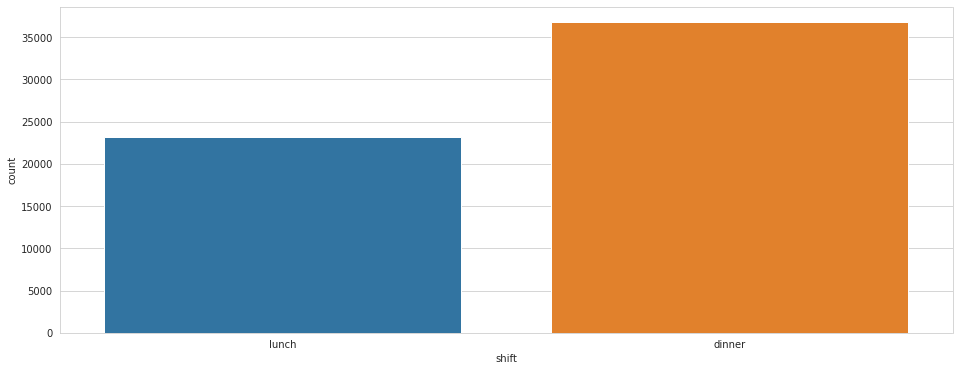

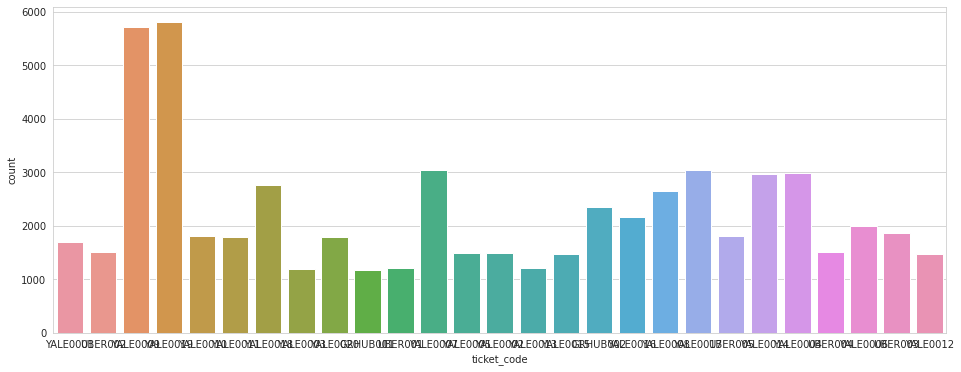

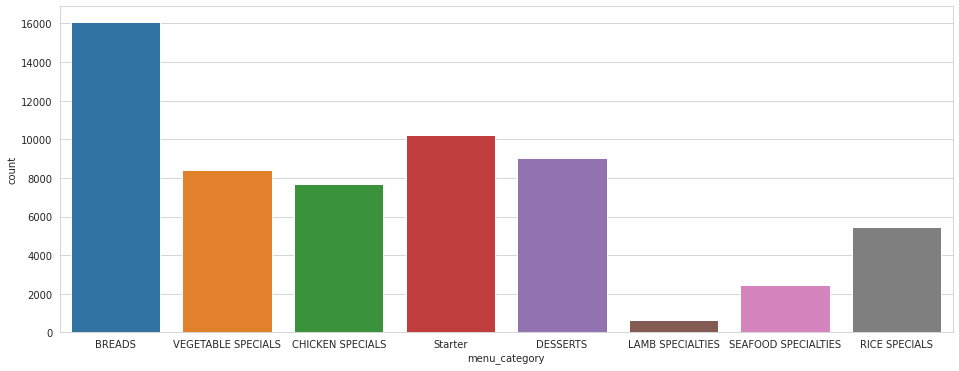

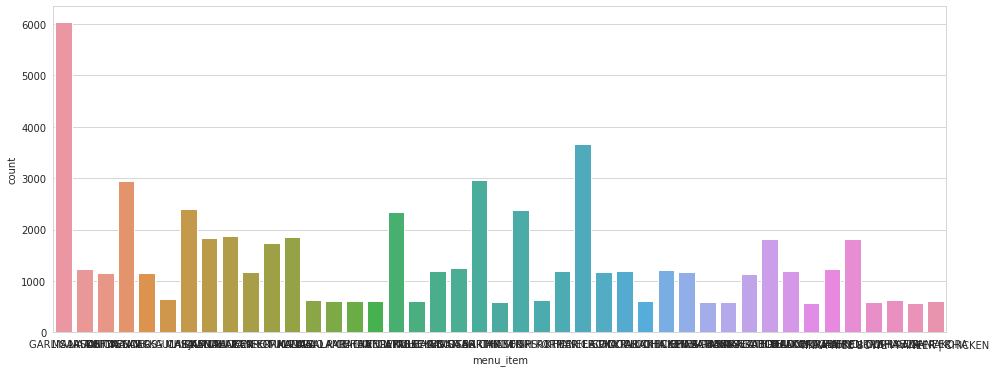

In [8]:
sns.set_style("whitegrid")
for i, col in enumerate(df_categorical.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=df_categorical)

In [9]:
for i, col in enumerate(df_categorical.columns):
    print('\n',i,'.',col)
    print(df_categorical[col].value_counts())
    print('*'*60,'\n')


 0 . shift
dinner    36789
lunch     23218
Name: shift, dtype: int64
************************************************************ 


 1 . ticket_code
YALE0019    5806
YALE0009    5722
YALE0017    3045
YALE0007    3042
YALE0004    2994
YALE0014    2966
YALE0018    2761
YALE0008    2654
GRHUB002    2352
YALE0016    2164
YALE0006    1993
UBER003     1870
UBER005     1813
YALE0010    1806
YALE0020    1794
YALE0011    1788
YALE0001    1693
UBER004     1508
UBER002     1508
YALE0005    1491
YALE0002    1491
YALE0015    1482
YALE0012    1477
UBER001     1209
YALE0013    1206
YALE0003    1199
GRHUB001    1173
Name: ticket_code, dtype: int64
************************************************************ 


 2 . menu_category
BREADS                 16084
Starter                10242
DESSERTS                9038
VEGETABLE SPECIALS      8399
CHICKEN SPECIALS        7709
RICE SPECIALS           5464
SEAFOOD SPECIALTIES     2444
LAMB SPECIALTIES         627
Name: menu_category, dtype: int64
*********

In [10]:
df_numerical = df[['weekday', 'party_size', 'item_price','item_qty']]
df_numerical.describe()

,weekday,party_size,item_price,item_qty
count,60007.000000,60007.000000,60007.000000,60007.000000
mean,4.723949,3.348009,10.597005,1.430516
std,1.967346,1.504692,5.922158,0.604922
min,1.000000,1.000000,2.750000,1.000000
25%,3.000000,2.000000,5.000000,1.000000
50%,5.000000,3.000000,11.000000,1.000000
75%,6.000000,5.000000,16.000000,2.000000
max,7.000000,5.000000,19.000000,4.000000


<Figure size 432x288 with 0 Axes>

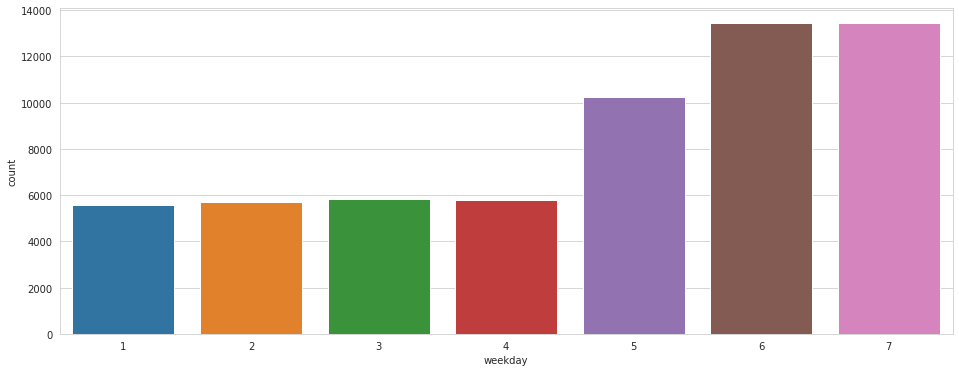

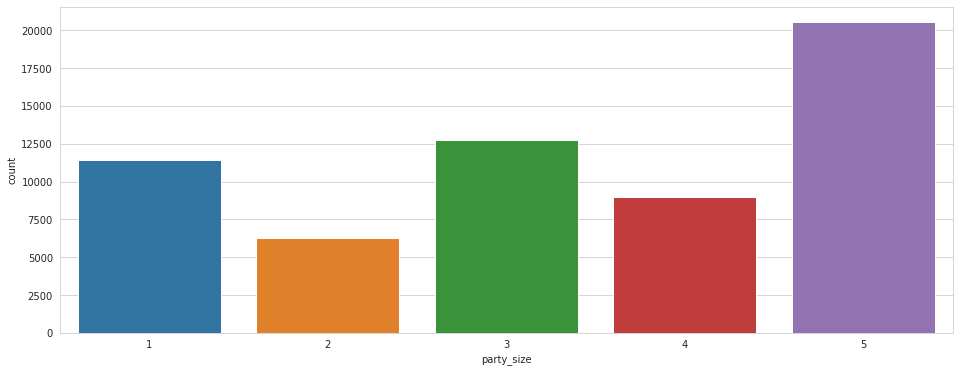

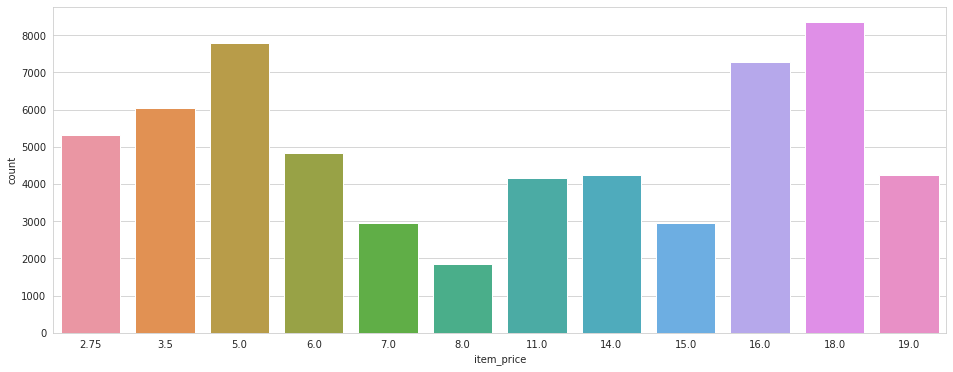

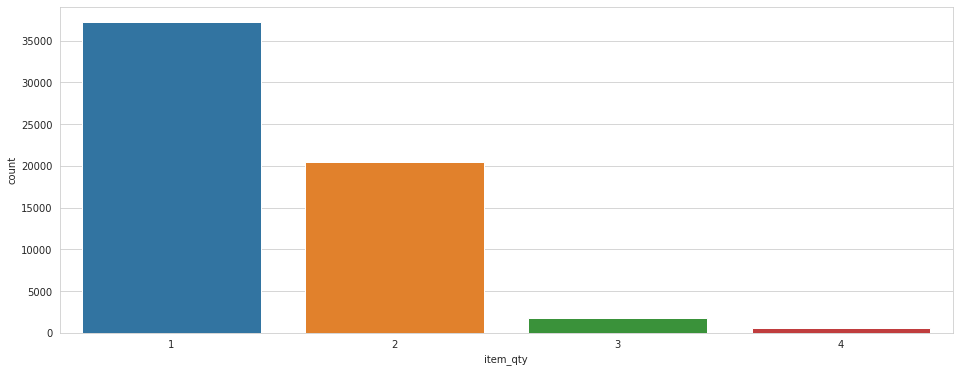

In [11]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    plt.figure(figsize=(16,6))
    sns.countplot(x=col, data=df_numerical)

<Figure size 864x864 with 0 Axes>

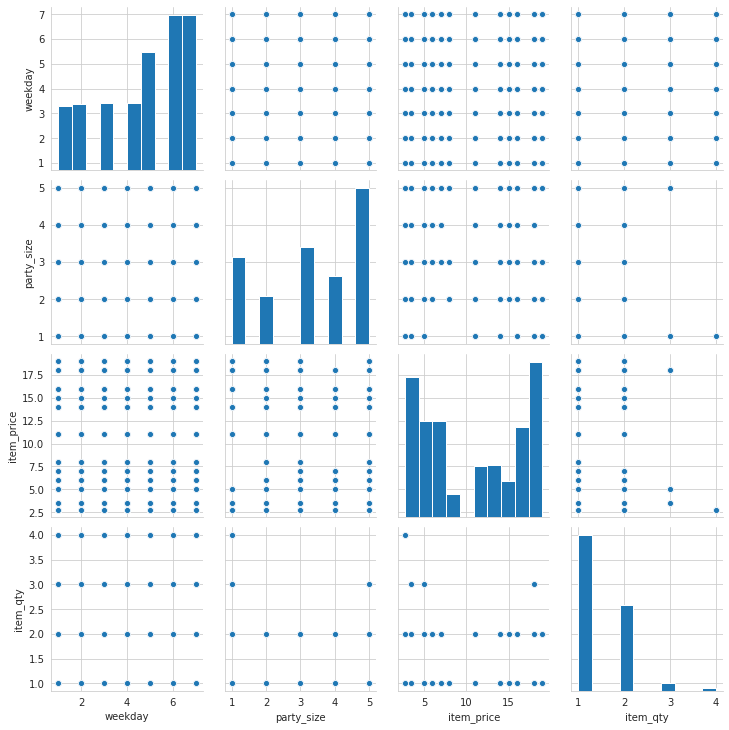

In [12]:
plt.figure(figsize=(12,12))
sns.pairplot(df_numerical)

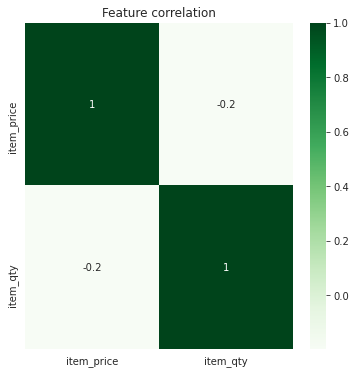

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(df_numerical[['item_price','item_qty']].corr(), cmap='Greens', annot=True)
plt.title('Feature correlation');

## Converting To Dummies

In [14]:
df_new = pd.get_dummies(df, columns=df_categorical.columns, drop_first=True)
print(df_new.shape)
df_new.head()

(60007, 81)


,dts,weekday,party_size,item_price,item_qty,shift_lunch,ticket_code_GRHUB002,ticket_code_UBER001,ticket_code_UBER002,ticket_code_UBER003,ticket_code_UBER004,ticket_code_UBER005,ticket_code_YALE0001,ticket_code_YALE0002,ticket_code_YALE0003,ticket_code_YALE0004,ticket_code_YALE0005,ticket_code_YALE0006,ticket_code_YALE0007,ticket_code_YALE0008,ticket_code_YALE0009,ticket_code_YALE0010,ticket_code_YALE0011,ticket_code_YALE0012,ticket_code_YALE0013,ticket_code_YALE0014,ticket_code_YALE0015,ticket_code_YALE0016,ticket_code_YALE0017,ticket_code_YALE0018,ticket_code_YALE0019,ticket_code_YALE0020,menu_category_CHICKEN SPECIALS,menu_category_DESSERTS,menu_category_LAMB SPECIALTIES,menu_category_RICE SPECIALS,menu_category_SEAFOOD SPECIALTIES,menu_category_Starter,menu_category_VEGETABLE SPECIALS,menu_item_BAINGAN BARTHA,...,menu_item_BUTTER CHICKEN,menu_item_CARROT HALWA,menu_item_CHAAT PAPRI,menu_item_CHICKEN BIRYANI,menu_item_CHICKEN KORMA,menu_item_CHICKEN SAAG,menu_item_CHICKEN TIKKA MASALA,menu_item_COCKTAIL CHICKEN SAMOSAS,menu_item_COCONUT CHICKEN CURRY,menu_item_FISH CURRY,menu_item_FISH KORMA,menu_item_FISH PAKORA,menu_item_GARLIC NAAN,menu_item_GOBI MANCHURIAN,menu_item_GULABJAMUN,menu_item_HARA BHARA KABOB,menu_item_KADAHI LAMB,menu_item_KADAHI PANEER,menu_item_KHEER,menu_item_LACHA PARATHA,menu_item_MALAI KOFTA,menu_item_MALPURA,menu_item_MASALA CHICKEN WINGS,menu_item_NAAN,menu_item_ONION KULCHA,menu_item_PANEER VINDALOO,menu_item_RASMALAI,menu_item_RICE,menu_item_SARSON DA SAAG,menu_item_SHAHI PANEER,menu_item_SHRIMP STRIPS,menu_item_SPICY CHICKEN BITES,menu_item_SPINACH NAAN,menu_item_TANDOORI ROTI,menu_item_TASTY FLATBREAD,menu_item_TASTY SLIDERS : CHICKEN PANEER,menu_item_TIKKA RICE BOWL : PANEER | CHICKEN,menu_item_VEGETABLE PAKORA,menu_item_VEGETABLE SAMOSA,menu_item_YELLOW DAL FRY
0,2019-01-01 11:30:00,2,4,3.50,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 11:30:00,2,1,16.00,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 11:30:00,2,5,15.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 11:35:00,2,5,2.75,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 11:35:00,2,2,2.75,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
mx_scaler = MinMaxScaler()
final_df2 = mx_scaler.fit_transform(df_new.drop(columns = ['item_qty','dts']))
final_df2 = pd.DataFrame(final_df2, columns=df_new.drop(columns = ['item_qty','dts']).columns)
print(final_df2.head())

    weekday  party_size  ...  menu_item_VEGETABLE SAMOSA  menu_item_YELLOW DAL FRY
0  0.166667        0.75  ...                         0.0                       0.0
1  0.166667        0.00  ...                         0.0                       0.0
2  0.166667        1.00  ...                         0.0                       0.0
3  0.166667        1.00  ...                         0.0                       0.0
4  0.166667        0.25  ...                         0.0                       0.0

[5 rows x 79 columns]


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X = final_df2
y = df_new['item_qty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify= y)
print(y_train.value_counts())
print(y_test.value_counts())

1    26028
2    14297
3     1251
4      428
Name: item_qty, dtype: int64
1    11156
2     6127
3      536
4      184
Name: item_qty, dtype: int64


# Algorithms

## 1. Decision Tree:

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.985280231072599
[[10967   189     0     0]
 [   76  6051     0     0]
 [    0     0   536     0]
 [    0     0     0   184]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     11156
           2       0.97      0.99      0.98      6127
           3       1.00      1.00      1.00       536
           4       1.00      1.00      1.00       184

    accuracy                           0.99     18003
   macro avg       0.99      0.99      0.99     18003
weighted avg       0.99      0.99      0.99     18003



## 2. Random Forest:

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500, random_state= 101)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9853357773704383
[[10957   199     0     0]
 [   65  6062     0     0]
 [    0     0   536     0]
 [    0     0     0   184]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     11156
           2       0.97      0.99      0.98      6127
           3       1.00      1.00      1.00       536
           4       1.00      1.00      1.00       184

    accuracy                           0.99     18003
   macro avg       0.99      0.99      0.99     18003
weighted avg       0.99      0.99      0.99     18003



## 3.Support Vector Classifier

In [19]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9834472032439038
[[10962   194     0     0]
 [  104  6023     0     0]
 [    0     0   536     0]
 [    0     0     0   184]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     11156
           2       0.97      0.98      0.98      6127
           3       1.00      1.00      1.00       536
           4       1.00      1.00      1.00       184

    accuracy                           0.98     18003
   macro avg       0.99      0.99      0.99     18003
weighted avg       0.98      0.98      0.98     18003



## 4. Gausian NB

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7144920291062601
[[6265 4602  289    0]
 [   0 5878  249    0]
 [   0    0  536    0]
 [   0    0    0  184]]
              precision    recall  f1-score   support

           1       1.00      0.56      0.72     11156
           2       0.56      0.96      0.71      6127
           3       0.50      1.00      0.67       536
           4       1.00      1.00      1.00       184

    accuracy                           0.71     18003
   macro avg       0.76      0.88      0.77     18003
weighted avg       0.84      0.71      0.72     18003



## 5. KNN

In [21]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9832250180525468
[[10982   174     0     0]
 [  128  5999     0     0]
 [    0     0   536     0]
 [    0     0     0   184]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     11156
           2       0.97      0.98      0.98      6127
           3       1.00      1.00      1.00       536
           4       1.00      1.00      1.00       184

    accuracy                           0.98     18003
   macro avg       0.99      0.99      0.99     18003
weighted avg       0.98      0.98      0.98     18003



# Meta Algorithms

## 1. Voting Classifier

In [22]:
from sklearn.ensemble import VotingClassifier
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=101)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('GaussianNB', nb),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

GaussianNB : 0.714
K Nearest Neighbours : 0.983
Classification Tree : 0.985
Voting Classifier: 0.985


## 2. Bagging Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(random_state=101)
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.985


## 3. AdaBoost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(random_state=101)
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=50)
abc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.985


## 4. XGBoost Classifier

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.928


# Cross Validation And Hyper Parameter Tuning

## 1. Using Randomized Search cv

In [26]:

from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = {'n_estimators': [100, 200, 300],'max_depth': range(5,25)}
rf = RandomForestClassifier()
randomized_cv = RandomizedSearchCV(estimator=rf, param_distributions=gbm_param_grid, n_iter=25,random_state=101, cv=4, verbose=1, n_jobs=-1)
randomized_cv.fit(X_train, y_train)
print("Best parameters found: ",randomized_cv.best_params_)
print("Best Score found: ", np.sqrt(np.abs(randomized_cv.best_score_)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


Best parameters found:  {'n_estimators': 100, 'max_depth': 24}
Best Score found:  0.9926642657709682


## 2. Using GridSearch CV

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [300, 400, 500],'max_depth': [24,25,26,27]}
rf = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Best parameters found: ",grid_cv.best_params_)
print("Best Score found: ", np.sqrt(np.abs(grid_cv.best_score_)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.6min finished


Best parameters found:  {'max_depth': 27, 'n_estimators': 400}
Best Score found:  0.9927721842631779
